### Datasets
- Dataset comes from the current Kaggle competition **House Prices - Advanced Regression Techniques**
- Data was downloaded using below command

In [376]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


In [377]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge



In [421]:
# Data import 
train = pd.read_csv('data/train.csv')

print(f"Sales price starting from {train['SalePrice'].min():.0f} to {train['SalePrice'].max():.0f}, \nwith median house price at {train['SalePrice'].median():.0f} \nand mean house price at {train['SalePrice'].mean():.0f}")
train.head()

Sales price starting from 34900 to 755000, 
with median house price at 163000 
and mean house price at 180921


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Description
<p>First, to evaluate the data. I reviewed the full description of each column from the documentation, and using
df.head() to review the first 5 rows.</p>
<p>Then, I assigned the columns to <b>categorical features</b> or <b>numerical features</b>.  </p>
<p>Some columns should not be considered as 'features' for training, such as the 'ID' column, and target value 'SalePrice'. </p>
<p>Note: because there're too many columns to display, I print out all columns using print(df.columns) in order to categorize the features. </p>

In [379]:
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
                        'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',  'BsmtCond', 'BsmtExposure',
                        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
                        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                        'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',  'SaleType',
                        'SaleCondition']

numerical_features = ['MSSubClass','LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                      'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                      'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'Fireplaces',
                      'BedroomAbvGr', 'KitchenAbvGr',  'TotRmsAbvGrd','GarageYrBlt', 'GarageCars', 'GarageArea', 
                      'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                      'MiscVal', 'MoSold', 'YrSold']



In [380]:
def describe_data(df:pd.DataFrame, categorical_feat:list, numerical_feat:list): 
    """
    Function to describe the data
    """
    print(f'Data Size {len(df)}')
    print(f'Number of columns {df.shape[1]}')
    print(f'Number of rows {df.shape[0]}')
    print(f'Number of categorical features {len(categorical_feat)}')
    print(f'Number of numerical features {len(numerical_feat)}')
    print(f'Number of null values in categorical features {df[categorical_feat].isnull().sum().sum()}')
    print(f'Number of null values in numerical features {df[numerical_feat].isnull().sum().sum()}')


describe_data(df=train, categorical_feat=categorical_features, numerical_feat=numerical_features)

Data Size 1460
Number of columns 81
Number of rows 1460
Number of categorical features 43
Number of numerical features 36
Number of null values in categorical features 7481
Number of null values in numerical features 348


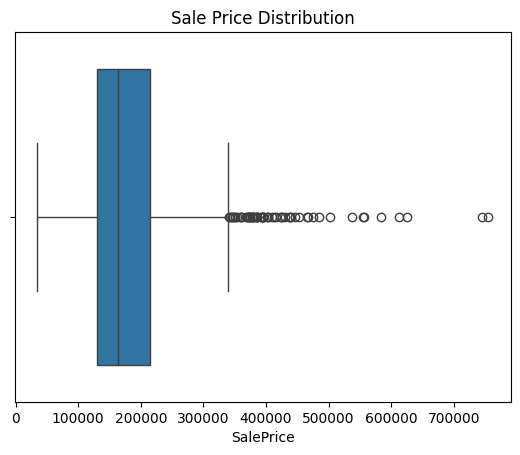

In [381]:
# I also want to plot out the distribution of the target variable and see if there're any outliers
# For now, I will keep the outliers in case we find some strong features that cause the outliers 
sns.boxplot(x=train['SalePrice'])
plt.title('Sale Price Distribution')
plt.show()

### Data Cleaning

In [382]:
def find_null_values(df:pd.DataFrame): 
    """
    Function to find null values in the data
    """
    
    
    # Review null values for each feature 
    null_counts = df.isnull().sum()
    # Sort by most nulls
    print(null_counts.sort_values(ascending=False)[:10])

    # Plot null values
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values')
    plt.show()

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64


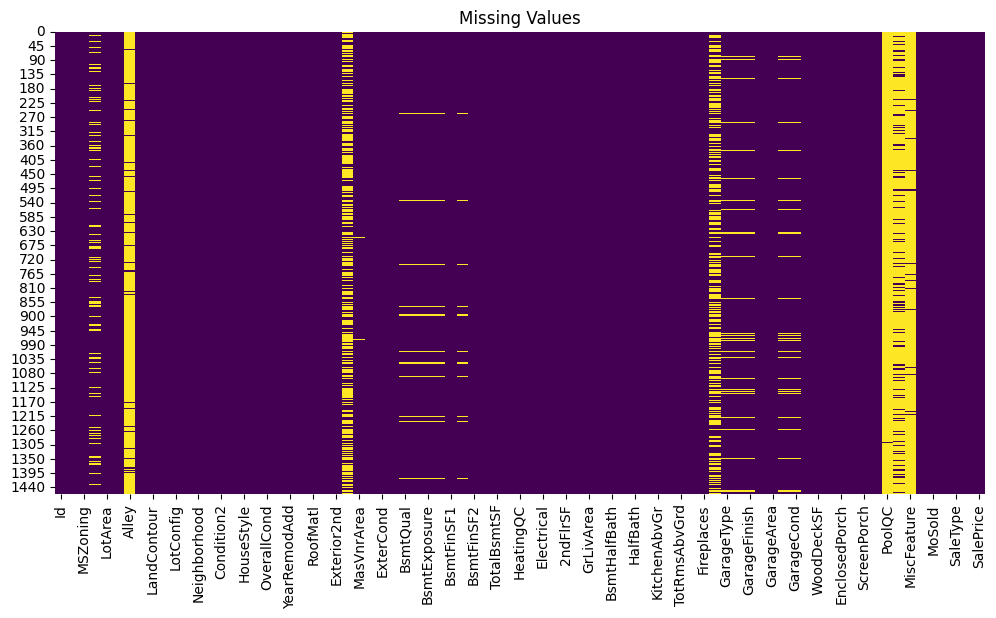

In [383]:
find_null_values(df=train)

MSSubClass      0
MSZoning        0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
dtype: int64


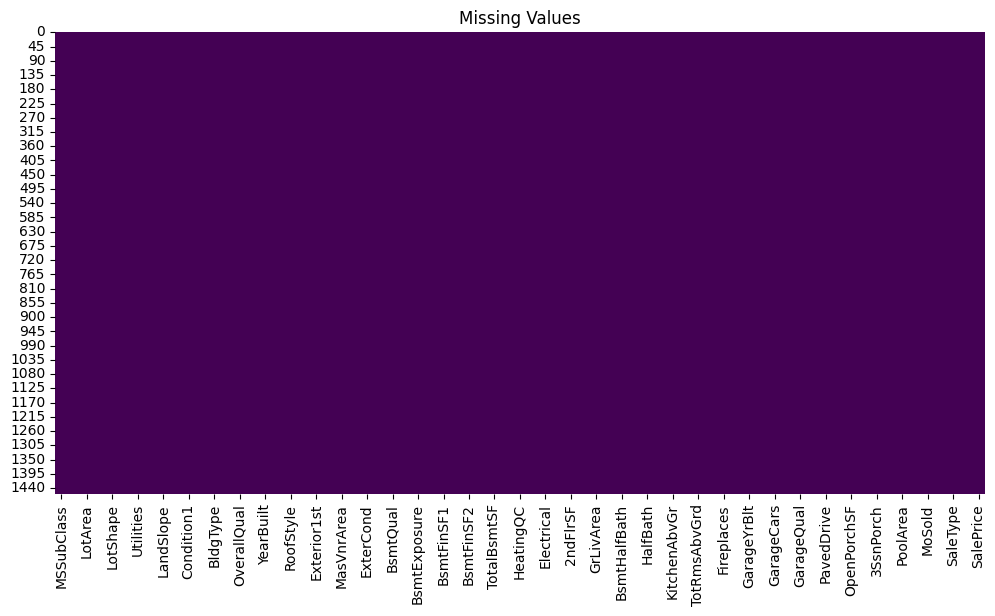

In [384]:
# After evaluating the null values, I found that null values mostly occur with categorical features.
# First, to treat the null values in categorical features, I will replace the null values with 'unknown'.
# Secondly, for numerical features, I will replace the null values with the mean of the feature.
# For data types, I will convert the categorical features to 'str' type and numerical features to 'float64' type.
# Finally, based on previoius step's evaluation, I will drop the columns with more than 25% null values.
# And columns like 'Id' is not a feature, we will drop it too

def clean_data(df: pd.DataFrame, categorical_feat:list,  numerical_feat:list, col_to_drop:list):
    """
    Function to clean the data
    """
    # Replace null values with 'unknown' for categorical features
    df[categorical_feat] = df[categorical_feat].fillna('unknown')
    # data type conversion
    df[categorical_feat] = df[categorical_feat].astype(str)

    # Replace null values with the mean for numerical features
    df[numerical_feat] = df[numerical_feat].fillna(df[numerical_feat].mean())
    # data type conversion
    df[numerical_feat] = df[numerical_feat].astype(float)

    # Drop columns with more than 25% null values
    df = df.drop(columns=col_to_drop)


    return df 

col_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType', 'FireplaceQu', 'LotFrontage', 'Id']
train = clean_data(df=train, categorical_feat=categorical_features, numerical_feat=numerical_features, col_to_drop=col_to_drop)

# Now after cleaning the data, I will check the null values again to see if there are any null values left.
find_null_values(df=train)


### EDA 
Before I start analyzing the relationship among features, I need to encode the categorical features which are currently string. 

In [385]:
# Update the categorical features list by removing the dropped columns
categorical_features = [col for col in categorical_features if col not in col_to_drop]

# Encode the categorical features using numerical encoding

def encode_categorical_features(df: pd.DataFrame, categorical_feat:list):
    """
    Function to encode categorical features
    """
    for col in categorical_feat:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

train = encode_categorical_features(df=train, categorical_feat=categorical_features)

# Now I will check the data types of the features to see if they are all in the right format
train[categorical_features].describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.028767,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,...,3.682877,2.339726,5.749315,2.485616,1.284247,3.927397,3.960959,1.856164,7.513014,3.770548
std,0.632017,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,...,1.051834,0.830161,0.979659,1.933206,0.892831,0.647822,0.566832,0.496592,1.552100,1.100854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,7.000000,2.000000,2.000000,...,4.000000,2.000000,6.000000,1.000000,1.000000,4.000000,4.000000,2.000000,8.000000,4.000000
50%,3.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,12.000000,2.000000,2.000000,...,4.000000,3.000000,6.000000,1.000000,1.000000,4.000000,4.000000,2.000000,8.000000,4.000000
75%,3.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,17.000000,2.000000,2.000000,...,4.000000,3.000000,6.000000,5.000000,2.000000,4.000000,4.000000,2.000000,8.000000,4.000000
max,4.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,24.000000,8.000000,7.000000,...,5.000000,3.000000,6.000000,6.000000,3.000000,5.000000,5.000000,2.000000,8.000000,5.000000


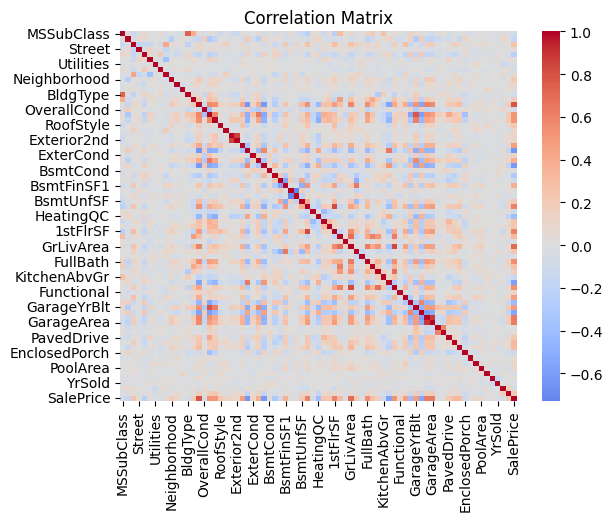

In [386]:
# Then I will print the correlation matrix to see if there are any strong correlations between the features

plt.Figure(figsize=(20, 16))
sns.heatmap(train.corr(), center=0, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### ANOVA(F-test)
to analyze the relationship between **categorical features** and the **numerical Target**

In [387]:
# From the result, we can tell there are some strong correlations between the features.
# I will run F-test to see if there are any relationships between the categorical features and the target variable

X = train[categorical_features]
y = train['SalePrice']
f, p = f_classif(X, y)

# Use a DataFrame to display the F-values and p-values, sorted by F-value
pd.DataFrame({'Feature': X.columns, 'F-Value': f, 'P-Value': p}).sort_values(by='F-Value', ascending=False)

,Feature,F-Value,P-Value
16,ExterQual,3.774880,1.399918e-69
19,BsmtQual,3.073745,5.705558e-51
28,KitchenQual,2.904745,2.611246e-46
31,GarageFinish,2.363707,4.018668e-31
1,Street,1.870717,1.666754e-17
0,MSZoning,1.742791,3.566350e-14
30,GarageType,1.639677,1.310937e-11
26,CentralAir,1.572276,5.244346e-10
9,Condition2,1.536908,3.405747e-09
18,Foundation,1.498846,2.411258e-08


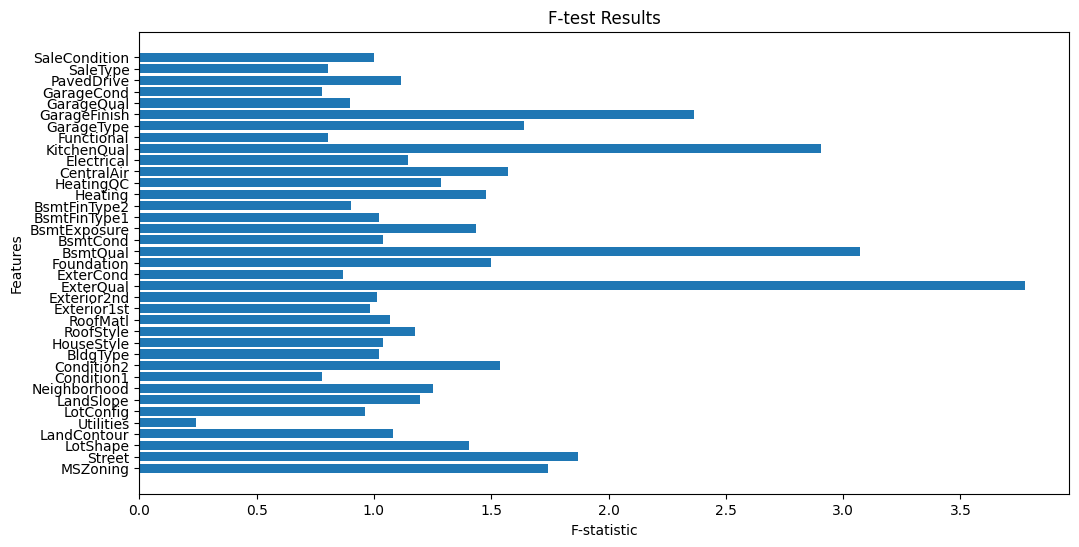

In [388]:
plt.figure(figsize=(12, 6))
plt.barh(categorical_features, f)
plt.title('F-test Results')
plt.xlabel('F-statistic')
plt.ylabel('Features')
plt.show()

### Feature Interaction, Collinearity 

In [389]:
# List out all columns available 
print(train.columns)

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

### Model 1 - **Multi-linear model**
<p>Evaluating feature importance and collinearity </p>

In [390]:
# First, with the help of the correlation matrix, I will select the numerical features that have a strong relationship with the target variable.
# Secondly, with the help of the F-test, I will select the categorical features that have a strong relationship with the target variable.

lin_model = smf.ols(formula='SalePrice ~ OverallCond + GrLivArea + RoofStyle + GarageArea + ExterQual + BsmtQual + KitchenQual + GarageFinish ', data=train).fit()
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     577.1
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -17500.
No. Observations:                1460   AIC:                         3.502e+04
Df Residuals:                    1451   BIC:                         3.506e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.478e+05   8982.925     16.453   

**Summary**: 
**R-squared = 0.761** with all selected features having p-value < 0.05

### Model 2 - **Multi-linear with interactions**
Now I want to see if interactions between the features can improve the model 

In [391]:
interaction_model = smf.ols(formula='SalePrice ~ OverallCond + GrLivArea * GarageArea + GrLivArea * Functional + RoofStyle  + ExterQual * BsmtQual * KitchenQual * GarageFinish', data=train).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     233.7
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -17433.
No. Observations:                1460   AIC:                         3.491e+04
Df Residuals:                    1437   BIC:                         3.503e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [392]:
# The R-squared is improving from 0.76 to 0.78 
# We are getting some large P-values for certain features of interaction, so I will remove them and add others that may be better predictors
interaction_model = smf.ols(formula='SalePrice ~ OverallCond + GrLivArea + GarageArea + GarageYrBlt + RoofStyle  + ExterQual + BsmtQual * GarageFinish + BsmtUnfSF', data=train).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     456.4
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:                -17505.
No. Observations:                1460   AIC:                         3.503e+04
Df Residuals:                    1449   BIC:                         3.509e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3.251e+

<p><b>Summary</b></p>
<p>Removing features having high p-value actually resulting in lower R-squared. It also get complicated to pick and choose the best feature combos since there are 72 features to choose from. </p>
<p>The next step is to explore regularized model approach such as <b>Ridge Regression</b> or <b>Lasso Regression</b>

### Model 3 - **Ridge Regression**

In [393]:
# First we define training data's X and y
X_train = train.drop(columns=['SalePrice'])
y_train = train['SalePrice']

In [394]:
linridge = Ridge(alpha=20).fit(X_train, y_train)
print(f'Ridge model R-squared score: {linridge.score(X_train, y_train)}')


Ridge model R-squared score: 0.8474463634425171


In [395]:
# Print out feature importance 
feature_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': linridge.coef_})
feature_imp = feature_imp.sort_values(by='Importance', ascending=False)

print(feature_imp[:10])

         Feature    Importance
14   OverallQual  11596.841823
56    GarageCars  10108.537710
3         Street   6547.611431
43  BsmtFullBath   6041.574088
52    Fireplaces   5053.351021
19      RoofMatl   4803.814004
8      LandSlope   4475.629595
15   OverallCond   4437.603727
51    Functional   3889.427595
45      FullBath   3745.026444


The R-squared score now improved to 0.85. Let's also try out Lasso Regression to have sparse features since current dimension is high 

### Model 4 - **Lasso Regression**

In [396]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)
lasso = Lasso(alpha=20, max_iter= 10000).fit(X_train_scaled, y_train)

print(f'Lasso model R-squared score: {lasso.score(X_train_scaled, y_train)}')

Lasso model R-squared score: 0.8476755450999216


In [403]:

feature_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': lasso.coef_})
feature_imp = feature_imp[feature_imp['Importance'] != 0]
feature_imp = feature_imp.sort_values(by='Importance', ascending=False)

print(f'Number of Non-Zero features {len(feature_imp)}.')
print('Features with non-zero coefficients:')
print(feature_imp[:10])

Number of Non-Zero features 46.
Features with non-zero coefficients:
         Feature     Importance
42     GrLivArea  168135.919129
14   OverallQual  108291.556019
56    GarageCars   35076.723821
15   OverallCond   26530.932921
16     YearBuilt   25997.134527
43  BsmtFullBath   25716.034796
52    Fireplaces   25027.676245
8      LandSlope   17729.434390
65   ScreenPorch   15531.442646
45      FullBath   15370.150599


### Model Comparison 
- Both Ridge and Lasso Regression achieved the best R-squared score so far, around **R-squared = 0.85** 
- However, consider that this data has so many columns, I think Lasso works quite well by giving zero coef to some of the non-important features 

### Hyperparameter Tuning
Lastly, with Lasso Regression, I will loop through some alpha setting to find the best value for alpha, the regularization parameter

In [398]:
for alpha in [0.1, 0.5, 1, 2, 3, 5, 10, 20, 50, 100]:
    linlasso = Lasso(alpha=alpha, max_iter=10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)

    print(f'Alpha: {alpha}, R-squared: {r2_train}')

Alpha: 0.1, R-squared: 0.8482449178416287
Alpha: 0.5, R-squared: 0.8482445017312346
Alpha: 1, R-squared: 0.8482432141872195
Alpha: 2, R-squared: 0.8482379827387032
Alpha: 3, R-squared: 0.8482292942908589
Alpha: 5, R-squared: 0.848201888365872
Alpha: 10, R-squared: 0.8480906711583363
Alpha: 20, R-squared: 0.8476755450999216
Alpha: 50, R-squared: 0.8456980782138477
Alpha: 100, R-squared: 0.8420106943751403


### Removing Outliers

In [399]:
# The different Alpha values are giving very similar R-squared scores, so at this point I want to evaluate the model performance with the test data to see if there's a bias-variance tradeoff.

# Remember during the EDA phrase we find some outiers using boxplot, so I will remove them from the test data to see if the model performance improves

def remove_outliers(df: pd.DataFrame, col:str):
    """
    Function to remove outliers from the data
    """ 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


train = remove_outliers(df=train, col='SalePrice')
X_train = train.drop(columns=['SalePrice'])
y_train = train['SalePrice']
X_train_scaled = MinMaxScaler().fit_transform(X_train)
lasso = Lasso(alpha=20, max_iter=10000).fit(X_train_scaled, y_train)
print(f'Lasso model R-squared score: {lasso.score(X_train_scaled, y_train)}')



Lasso model R-squared score: 0.8516503136996161


In [400]:
# With outliers removed, the model performance is improved with R-squared score of 0.85
# We will repeat the alpha hyperparameter tuning with the train data to see if the model performance improves

for alpha in [0.1, 0.5, 1, 2, 3, 5, 10, 20, 50, 100]:
    linlasso = Lasso(alpha=alpha, max_iter=10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    print(f'Alpha: {alpha}, R-squared: {r2_train}')

Alpha: 0.1, R-squared: 0.852533835109657
Alpha: 0.5, R-squared: 0.8525331729775635
Alpha: 1, R-squared: 0.85253110731051
Alpha: 2, R-squared: 0.8525232671280487
Alpha: 3, R-squared: 0.8525119669831295
Alpha: 5, R-squared: 0.852475849900235
Alpha: 10, R-squared: 0.8523061576098905
Alpha: 20, R-squared: 0.8516503136996161
Alpha: 50, R-squared: 0.8486751650425345
Alpha: 100, R-squared: 0.844165172591293


### Final Model and Evaluation 

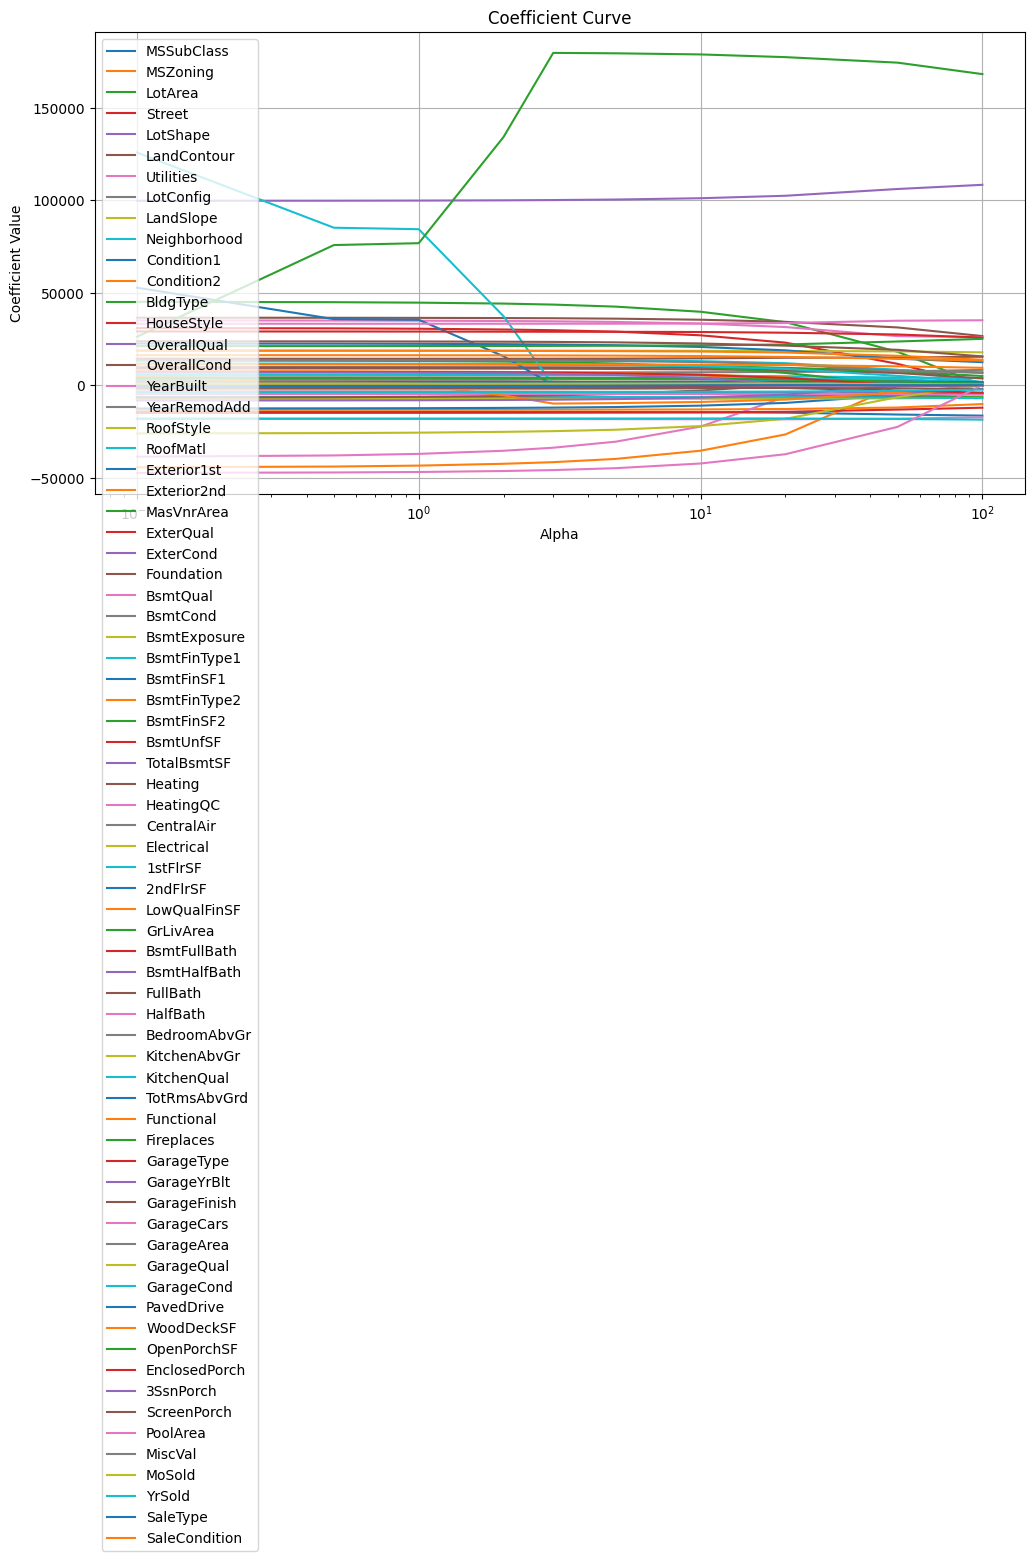

In [401]:
# Plot the Coefficient Curve along different alpha values
alphas = [0.1, 0.5, 1, 2, 3, 5, 10, 20, 50, 100]
coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000).fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)
coefs = pd.DataFrame(coefs, index=alphas, columns=X_train.columns)
plt.figure(figsize=(12, 6))
plt.plot(coefs)
plt.title('Coefficient Curve')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.legend(coefs.columns)
plt.xscale('log')
plt.grid()
plt.show()
# The coefficient curve is showing that as alpha increases, the coefficients are getting smaller and smaller.

In [402]:
# The final model will use alpha=0.1 as the best alpha value, to avoid any large coefficients that may cause overfitting.

final_model = Lasso(alpha=0.1, max_iter=10000).fit(X_train_scaled, y_train)
print(f'Final model R-squared score: {final_model.score(X_train_scaled, y_train)}')
# The final model is giving a R-squared score of 0.85 with the train data.

Final model R-squared score: 0.852533835109657
